### Atividade Data Mining

#### Tema: Venda de Carros
#### Dataset: https://www.kaggle.com/datasets/missionjee/car-sales-report

### Integrantes:

#### Bruno de Moraes Xavier da Silva
#### Igor Altafini Teodoro 
#### Luan Vinicius Garcia 

### Importando Bibliotecas

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

### Explorando Dataset

In [70]:
data = pd.read_csv('./dataset/carros_vendas.csv')
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


##### Podemos observar que alguns nomes estão escritos de maneira incorreta alem da coluna 'Date' que possui os mesmo valores para todos os registros

In [71]:
data.shape

(5000, 16)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         5000 non-null   object
 1   Date           5000 non-null   object
 2   Customer Name  5000 non-null   object
 3   Gender         5000 non-null   object
 4   Annual Income  5000 non-null   int64 
 5   Dealer_Name    5000 non-null   object
 6   Company        5000 non-null   object
 7   Model          5000 non-null   object
 8   Engine         5000 non-null   object
 9   Transmission   5000 non-null   object
 10  Color          5000 non-null   object
 11  Price ($)      5000 non-null   int64 
 12  Dealer_No      5000 non-null   object
 13  Body Style     5000 non-null   object
 14  Phone          5000 non-null   int64 
 15  Dealer_Region  5000 non-null   object
dtypes: int64(3), object(13)
memory usage: 625.1+ KB


In [73]:
data.describe()

,Annual Income,Price ($),Phone
count,5.000000e+03,5000.000000,5.000000e+03
mean,8.690544e+05,28236.414400,7.493386e+06
std,7.556848e+05,14821.590317,8.696176e+05
min,1.350000e+04,9000.000000,6.000326e+06
25%,4.050000e+05,18100.000000,6.742709e+06
50%,7.525000e+05,23000.000000,7.494095e+06
75%,1.230000e+06,34625.750000,8.238121e+06
max,6.240000e+06,85600.000000,8.999305e+06


#### Podemos observar que nao ha nenhum dado faltando neste dataset

### Normalizando Dados

#### Corrigindo nomenclaturas

In [74]:
data['Engine'] = data['Engine'].str.replace('Â','',regex=False)
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [75]:
data.loc[data['Engine'] == "Overhead Camshaft",'Engine'] = 'OHC'
data.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora


#### Removendo coluna de Data(Date) pois todos os registros possuem a mesma data

In [76]:
data = data.drop(data.columns[1],axis = 1)
data.head(2)

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora


### Analisando os dados Normalizados

In [58]:
tipo_carroceria = data['Body Style'].value_counts()
print(tipo_carroceria)

Body Style
Hatchback    1475
SUV          1366
Sedan         953
Passenger     795
Hardtop       411
Name: count, dtype: int64


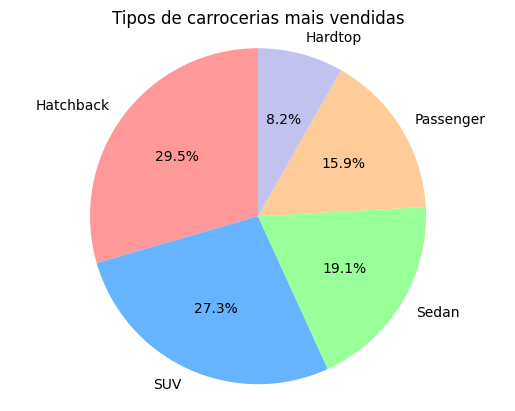

In [64]:
plt.pie(tipo_carroceria,labels=tipo_carroceria.index,autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.axis('equal')

plt.title('Tipos de carrocerias mais vendidas')

plt.show()

##### Podemos observar que o tipo de carroceria mais vendido é o hatchback